In [1]:
from typing import List, Callable

import numpy as np
import pandas as pd
from experiments.common import run_increasing_size_neighborhoods_experiments
from experiments.data.synthetic_benchmarks import (
    benchmark_curve_1,
    benchmark_curve_2,
    benchmark_curve_3,
    benchmark_curve_4,
    benchmark_curve_5,
)

%load_ext autoreload
%autoreload 2

# Experiments in dense heteroscedastic settings with increasing window size
The following are plots and metrics for a number of experimental settings with dense heteroscedastic curves comparing the proposed Robust Local Polynomial Regression with Similarity Kernels method with LOWESS, robust LOWESS, kernel regression, local polynomial and RBF network regression. The plots are interactive and allows to hide and show different elements by clicking or double-clicking as well as to zoom in on areas of interest. 

In [2]:
extreme_noise_ratio: float = 0.95
high_noise_ratio: float = 0.65
medium_noise_ratio: float = 0.35
mild_noise_ratio: float = 0.15
hetero: bool = True
num_points: int = 150

size_neighborhoods: List[int] = [5, 7, 9, 11, 13, 15] + np.linspace(
    start=20, stop=num_points, num=10, endpoint=True
).astype(int).tolist()

bw1_f: Callable[[np.ndarray], List[float]] = (
    lambda data: [float(1 / np.clip(a=0.1 * data.shape[0], a_min=2.0, a_max=27.0))] * data.shape[1]
)

methods: List[str] = [
    "rsklpr",
    "lowess",
    "robust_lowess",
    "kernel_reg_ll",
    "kernel_reg_lc",
    "local_quad",
    "rbfnet",
]

## Curve 1

### Mild noise

Best performing method is rsklpr for size_neighborhood w_20


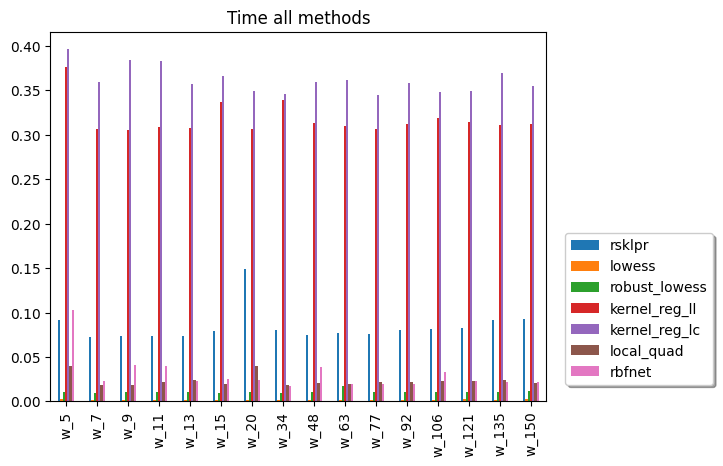

In [3]:
best_for_window: pd.DataFrame
worst_for_window: pd.DataFrame

best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [4]:
best_for_window

method      rmse
w_5    rbfnet  0.021166
w_7    rbfnet  0.023202
w_9    rbfnet  0.022584
w_11   rbfnet  0.022912
w_13   rsklpr  0.020057
w_15   rsklpr  0.017626
w_20   rsklpr  0.014407
w_34   rsklpr  0.015395
w_48   rsklpr  0.015935
w_63   rsklpr  0.019450
w_77   rbfnet  0.021884
w_92   rbfnet  0.022478
w_106  rsklpr  0.022548
w_121  rbfnet  0.022351
w_135  rbfnet  0.022478
w_150  rbfnet  0.022619

In [5]:
worst_for_window

method      rmse
w_5    robust_lowess  0.068109
w_7       local_quad  0.052353
w_9       local_quad  0.044868
w_11      local_quad  0.041509
w_13      local_quad  0.038560
w_15      local_quad  0.036828
w_20      local_quad  0.031141
w_34   kernel_reg_lc  0.026691
w_48   kernel_reg_lc  0.026691
w_63   robust_lowess  0.035165
w_77   robust_lowess  0.044962
w_92   robust_lowess  0.054055
w_106  robust_lowess  0.063412
w_121  robust_lowess  0.071524
w_135  robust_lowess  0.074354
w_150  robust_lowess  0.078301

### Medium noise

Best performing method is rsklpr for size_neighborhood w_63


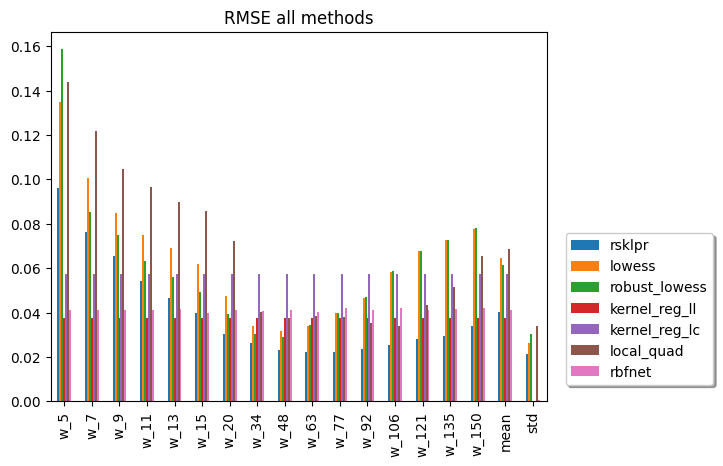

In [6]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [7]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.037550
w_7    kernel_reg_ll  0.037550
w_9    kernel_reg_ll  0.037550
w_11   kernel_reg_ll  0.037550
w_13   kernel_reg_ll  0.037550
w_15   kernel_reg_ll  0.037550
w_20          rsklpr  0.030358
w_34          rsklpr  0.026303
w_48          rsklpr  0.023100
w_63          rsklpr  0.022241
w_77          rsklpr  0.022458
w_92          rsklpr  0.023431
w_106         rsklpr  0.025619
w_121         rsklpr  0.028314
w_135         rsklpr  0.029298
w_150         rsklpr  0.034030

In [8]:
worst_for_window

method      rmse
w_5    robust_lowess  0.158581
w_7       local_quad  0.121911
w_9       local_quad  0.104540
w_11      local_quad  0.096722
w_13      local_quad  0.089860
w_15      local_quad  0.085883
w_20      local_quad  0.072353
w_34   kernel_reg_lc  0.057474
w_48   kernel_reg_lc  0.057474
w_63   kernel_reg_lc  0.057474
w_77   kernel_reg_lc  0.057474
w_92   kernel_reg_lc  0.057474
w_106  robust_lowess  0.058700
w_121         lowess  0.067851
w_135         lowess  0.072795
w_150  robust_lowess  0.077981

### High noise

Best performing method is rsklpr for size_neighborhood w_92


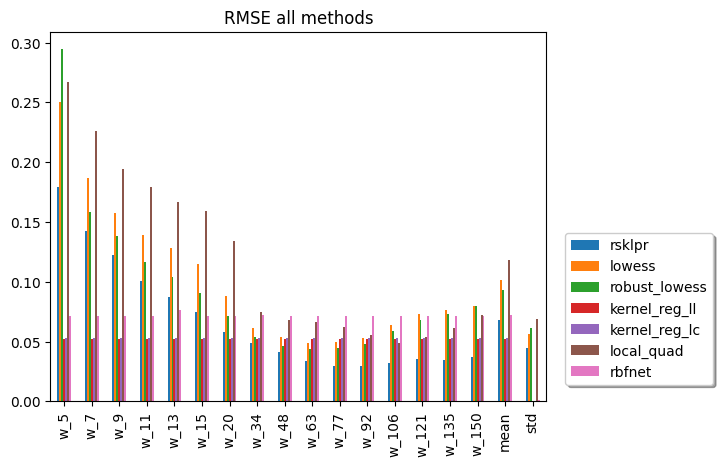

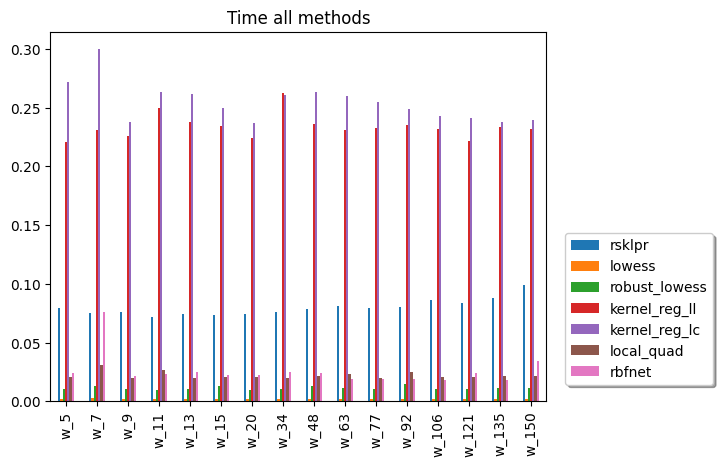

In [9]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [10]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.052573
w_7    kernel_reg_ll  0.052573
w_9    kernel_reg_ll  0.052573
w_11   kernel_reg_ll  0.052573
w_13   kernel_reg_ll  0.052573
w_15   kernel_reg_ll  0.052573
w_20   kernel_reg_ll  0.052573
w_34          rsklpr  0.048592
w_48          rsklpr  0.041207
w_63          rsklpr  0.034020
w_77          rsklpr  0.029728
w_92          rsklpr  0.029684
w_106         rsklpr  0.032498
w_121         rsklpr  0.035844
w_135         rsklpr  0.034722
w_150         rsklpr  0.037109

In [11]:
worst_for_window

method      rmse
w_5    robust_lowess  0.294319
w_7       local_quad  0.226252
w_9       local_quad  0.194053
w_11      local_quad  0.179555
w_13      local_quad  0.166828
w_15      local_quad  0.159497
w_20      local_quad  0.134286
w_34      local_quad  0.074925
w_48          rbfnet  0.071661
w_63          rbfnet  0.071583
w_77          rbfnet  0.071683
w_92          rbfnet  0.071747
w_106         rbfnet  0.071747
w_121         lowess  0.072797
w_135         lowess  0.076769
w_150         lowess  0.079842

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_92


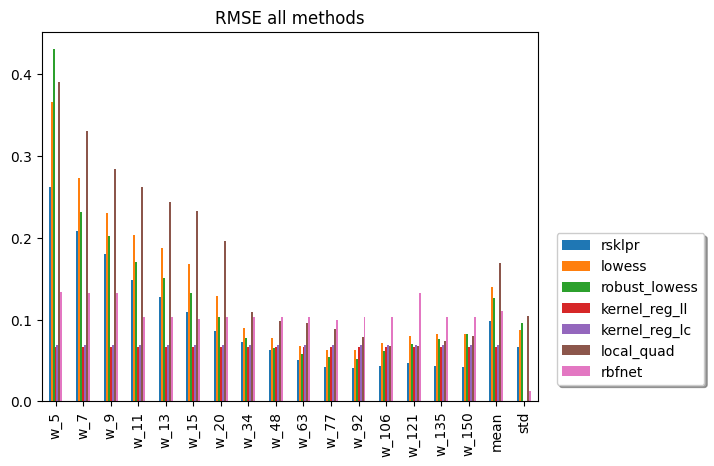

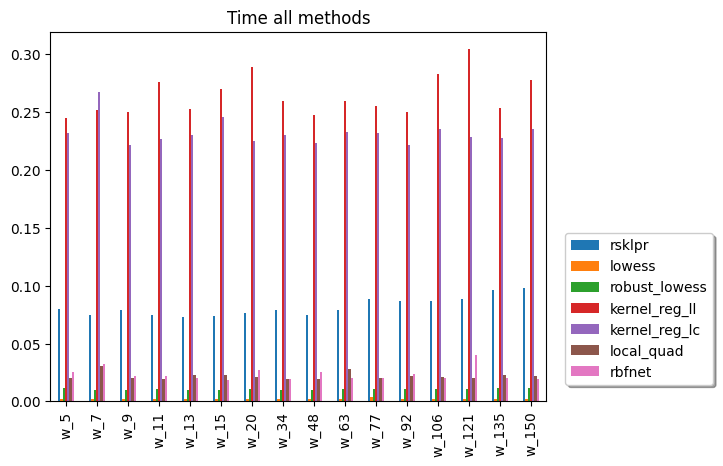

In [12]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [13]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.066500
w_7    kernel_reg_ll  0.066500
w_9    kernel_reg_ll  0.066500
w_11   kernel_reg_ll  0.066500
w_13   kernel_reg_ll  0.066500
w_15   kernel_reg_ll  0.066500
w_20   kernel_reg_ll  0.066500
w_34   kernel_reg_ll  0.066500
w_48          rsklpr  0.062205
w_63          rsklpr  0.051108
w_77          rsklpr  0.042630
w_92          rsklpr  0.041130
w_106         rsklpr  0.042778
w_121         rsklpr  0.047003
w_135         rsklpr  0.043198
w_150         rsklpr  0.042157

In [14]:
worst_for_window

method      rmse
w_5    robust_lowess  0.430046
w_7       local_quad  0.330594
w_9       local_quad  0.283568
w_11      local_quad  0.262389
w_13      local_quad  0.243799
w_15      local_quad  0.233117
w_20      local_quad  0.196241
w_34      local_quad  0.109580
w_48          rbfnet  0.102612
w_63          rbfnet  0.103152
w_77          rbfnet  0.099768
w_92          rbfnet  0.102958
w_106         rbfnet  0.102993
w_121         rbfnet  0.131989
w_135         rbfnet  0.102924
w_150         rbfnet  0.102933

## Curve 2

### Mild noise

Best performing method is rbfnet for size_neighborhood w_77


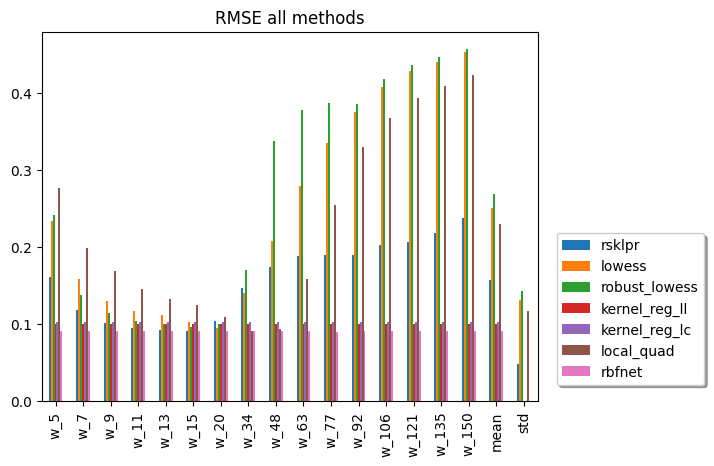

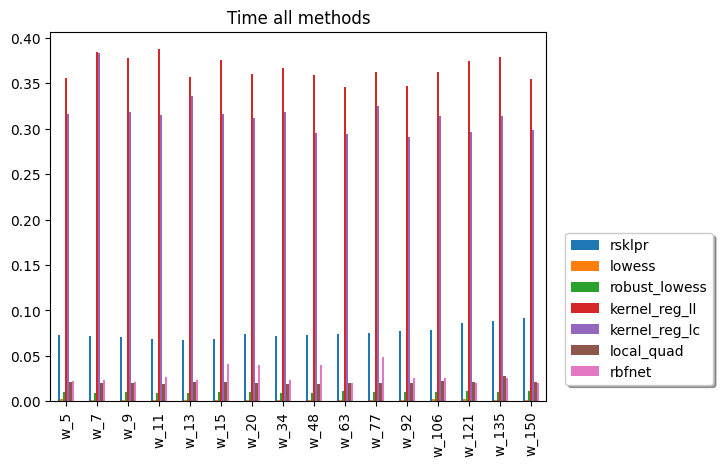

In [15]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [16]:
best_for_window

method      rmse
w_5    rbfnet  0.091285
w_7    rbfnet  0.091281
w_9    rbfnet  0.091274
w_11   rbfnet  0.091255
w_13   rbfnet  0.091240
w_15   rbfnet  0.091340
w_20   rbfnet  0.091254
w_34   rbfnet  0.090924
w_48   rbfnet  0.091254
w_63   rbfnet  0.091315
w_77   rbfnet  0.090552
w_92   rbfnet  0.091268
w_106  rbfnet  0.091830
w_121  rbfnet  0.091234
w_135  rbfnet  0.091296
w_150  rbfnet  0.091308

In [17]:
worst_for_window

method      rmse
w_5       local_quad  0.277474
w_7       local_quad  0.199665
w_9       local_quad  0.169166
w_11      local_quad  0.145730
w_13      local_quad  0.133288
w_15      local_quad  0.124452
w_20      local_quad  0.109575
w_34   robust_lowess  0.170814
w_48   robust_lowess  0.337960
w_63   robust_lowess  0.378363
w_77   robust_lowess  0.387470
w_92   robust_lowess  0.385301
w_106  robust_lowess  0.417659
w_121  robust_lowess  0.436104
w_135  robust_lowess  0.446497
w_150  robust_lowess  0.456686

### Medium noise

Best performing method is rsklpr for size_neighborhood w_20


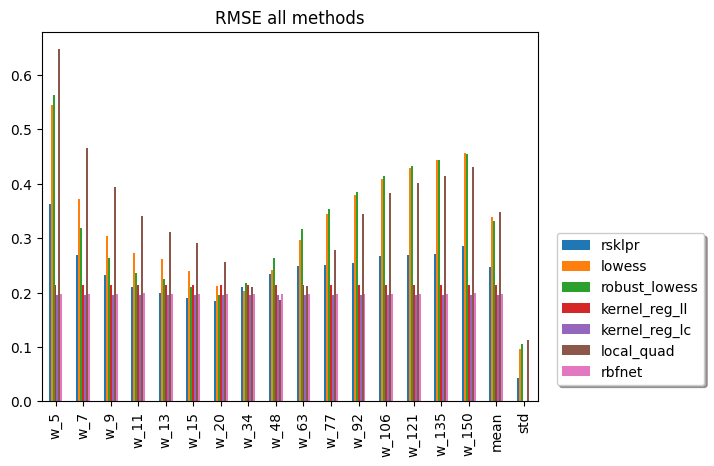

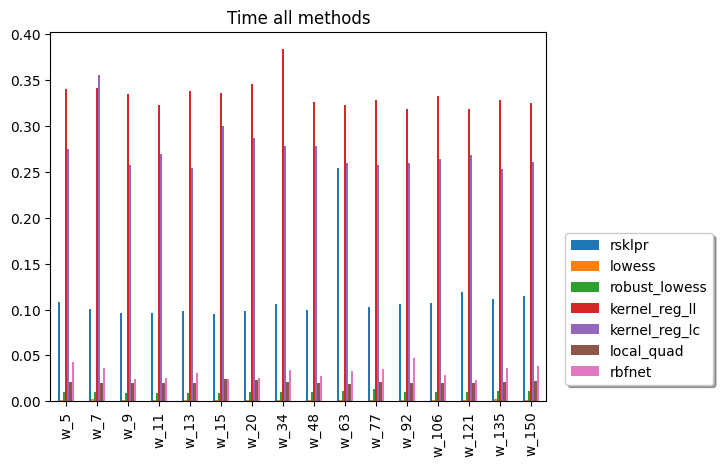

In [18]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="cv_ls_global",
    k2="joint",
    methods=methods,
)

In [19]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.195913
w_7    kernel_reg_lc  0.195913
w_9    kernel_reg_lc  0.195913
w_11   kernel_reg_lc  0.195913
w_13   kernel_reg_lc  0.195913
w_15          rsklpr  0.189244
w_20          rsklpr  0.185097
w_34   kernel_reg_lc  0.195913
w_48      local_quad  0.186453
w_63   kernel_reg_lc  0.195913
w_77   kernel_reg_lc  0.195913
w_92   kernel_reg_lc  0.195913
w_106  kernel_reg_lc  0.195913
w_121  kernel_reg_lc  0.195913
w_135  kernel_reg_lc  0.195913
w_150  kernel_reg_lc  0.195913

In [20]:
worst_for_window

method      rmse
w_5       local_quad  0.647156
w_7       local_quad  0.465708
w_9       local_quad  0.394638
w_11      local_quad  0.340026
w_13      local_quad  0.310955
w_15      local_quad  0.290621
w_20      local_quad  0.255615
w_34   robust_lowess  0.217146
w_48   robust_lowess  0.263458
w_63   robust_lowess  0.317403
w_77   robust_lowess  0.353894
w_92   robust_lowess  0.385846
w_106  robust_lowess  0.415035
w_121  robust_lowess  0.432464
w_135  robust_lowess  0.443628
w_150         lowess  0.456675

### High noise

Best performing method is rsklpr for size_neighborhood w_34


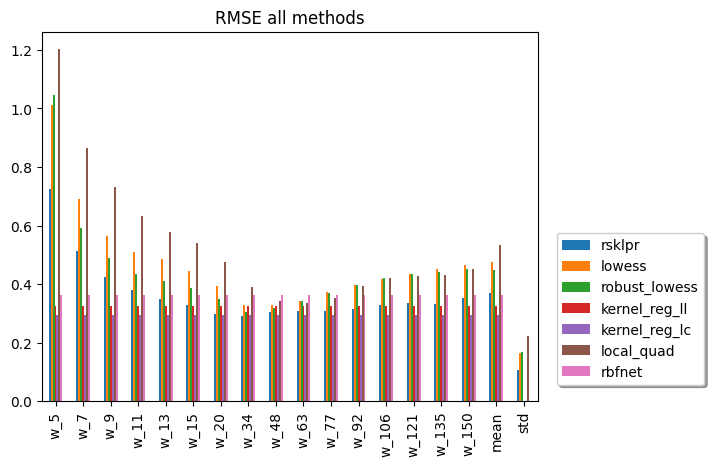

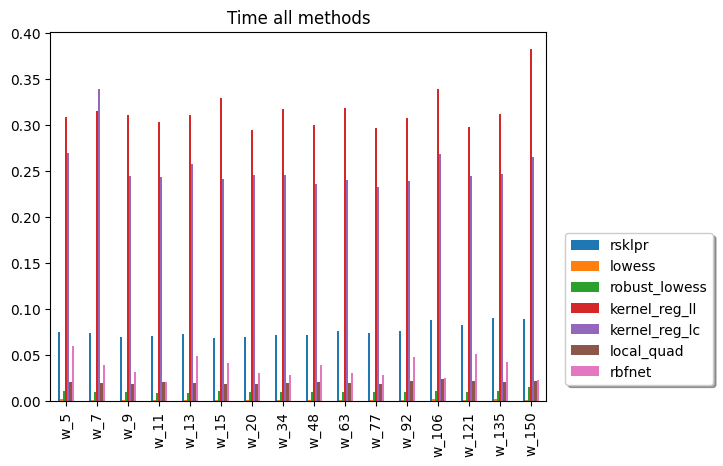

In [21]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [22]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.294714
w_7    kernel_reg_lc  0.294714
w_9    kernel_reg_lc  0.294714
w_11   kernel_reg_lc  0.294714
w_13   kernel_reg_lc  0.294714
w_15   kernel_reg_lc  0.294714
w_20   kernel_reg_lc  0.294714
w_34          rsklpr  0.290626
w_48   kernel_reg_lc  0.294714
w_63   kernel_reg_lc  0.294714
w_77   kernel_reg_lc  0.294714
w_92   kernel_reg_lc  0.294714
w_106  kernel_reg_lc  0.294714
w_121  kernel_reg_lc  0.294714
w_135  kernel_reg_lc  0.294714
w_150  kernel_reg_lc  0.294714

In [23]:
worst_for_window

method      rmse
w_5       local_quad  1.201680
w_7       local_quad  0.864771
w_9       local_quad  0.732847
w_11      local_quad  0.631476
w_13      local_quad  0.577472
w_15      local_quad  0.539909
w_20      local_quad  0.474831
w_34      local_quad  0.391736
w_48          rbfnet  0.361563
w_63          rbfnet  0.361605
w_77          lowess  0.373135
w_92   robust_lowess  0.398520
w_106     local_quad  0.422644
w_121         lowess  0.435675
w_135         lowess  0.452145
w_150         lowess  0.465415

### Extreme noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


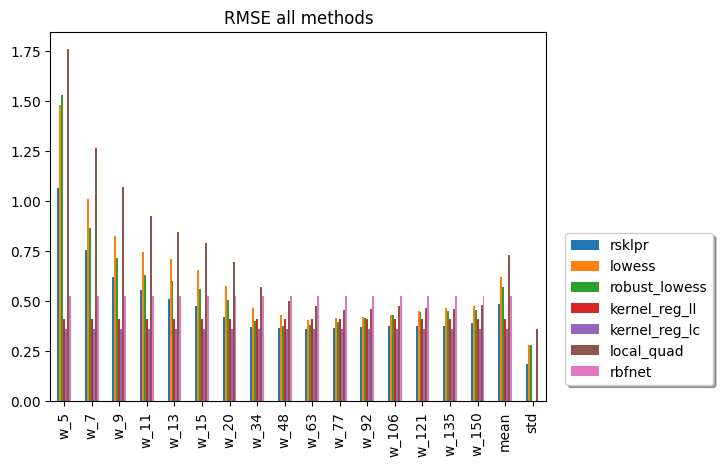

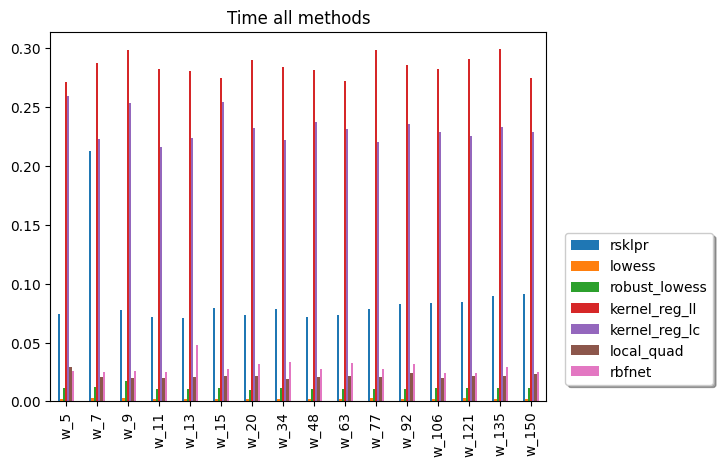

In [24]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [25]:
best_for_window

method     rmse
w_5    kernel_reg_lc  0.35903
w_7    kernel_reg_lc  0.35903
w_9    kernel_reg_lc  0.35903
w_11   kernel_reg_lc  0.35903
w_13   kernel_reg_lc  0.35903
w_15   kernel_reg_lc  0.35903
w_20   kernel_reg_lc  0.35903
w_34   kernel_reg_lc  0.35903
w_48   kernel_reg_lc  0.35903
w_63   kernel_reg_lc  0.35903
w_77   kernel_reg_lc  0.35903
w_92   kernel_reg_lc  0.35903
w_106  kernel_reg_lc  0.35903
w_121  kernel_reg_lc  0.35903
w_135  kernel_reg_lc  0.35903
w_150  kernel_reg_lc  0.35903

In [26]:
worst_for_window

method      rmse
w_5    local_quad  1.756204
w_7    local_quad  1.263835
w_9    local_quad  1.071056
w_11   local_quad  0.922927
w_13   local_quad  0.843991
w_15   local_quad  0.789204
w_20   local_quad  0.694077
w_34   local_quad  0.572866
w_48       rbfnet  0.526448
w_63       rbfnet  0.526355
w_77       rbfnet  0.526381
w_92       rbfnet  0.526359
w_106      rbfnet  0.526315
w_121      rbfnet  0.526332
w_135      rbfnet  0.526415
w_150      rbfnet  0.526441

## Curve 3

### Mild noise

Best performing method is robust_lowess for size_neighborhood w_15


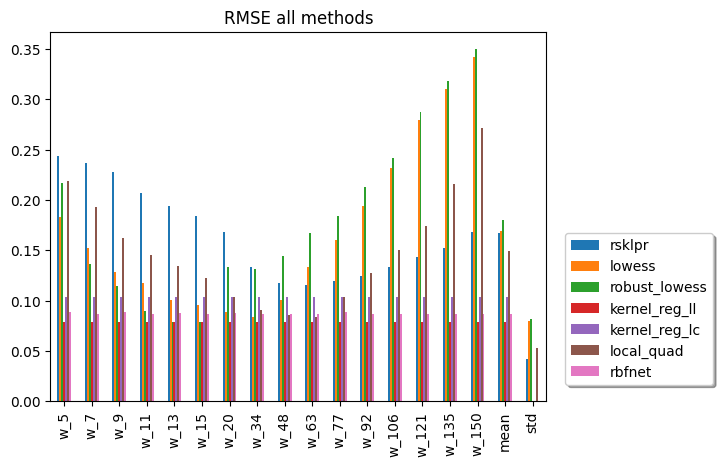

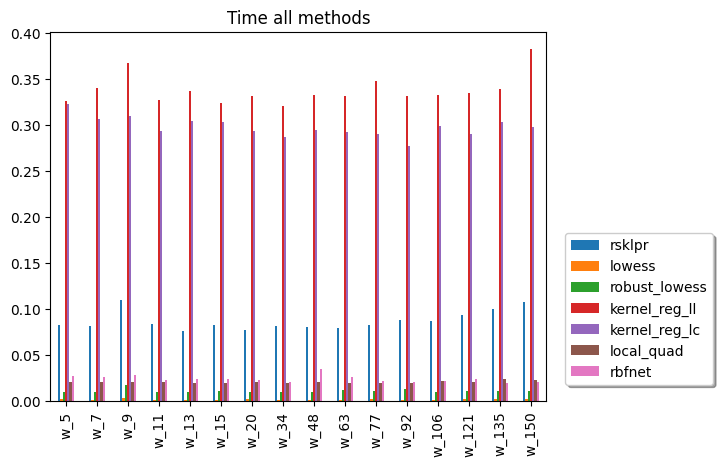

In [27]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [28]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.078802
w_7    kernel_reg_ll  0.078802
w_9    kernel_reg_ll  0.078802
w_11   kernel_reg_ll  0.078802
w_13   kernel_reg_ll  0.078802
w_15   robust_lowess  0.078583
w_20   kernel_reg_ll  0.078802
w_34   kernel_reg_ll  0.078802
w_48   kernel_reg_ll  0.078802
w_63   kernel_reg_ll  0.078802
w_77   kernel_reg_ll  0.078802
w_92   kernel_reg_ll  0.078802
w_106  kernel_reg_ll  0.078802
w_121  kernel_reg_ll  0.078802
w_135  kernel_reg_ll  0.078802
w_150  kernel_reg_ll  0.078802

In [29]:
worst_for_window

method      rmse
w_5           rsklpr  0.243869
w_7           rsklpr  0.236465
w_9           rsklpr  0.227592
w_11          rsklpr  0.207377
w_13          rsklpr  0.193963
w_15          rsklpr  0.184297
w_20          rsklpr  0.168590
w_34          rsklpr  0.133662
w_48   robust_lowess  0.144429
w_63   robust_lowess  0.167190
w_77   robust_lowess  0.184032
w_92   robust_lowess  0.212504
w_106  robust_lowess  0.241903
w_121  robust_lowess  0.287814
w_135  robust_lowess  0.318457
w_150  robust_lowess  0.349695

### Medium noise

Best performing method is kernel_reg_ll for size_neighborhood w_5


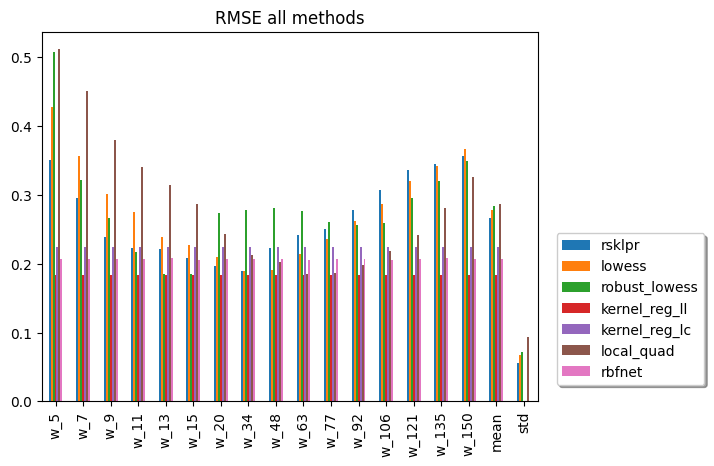

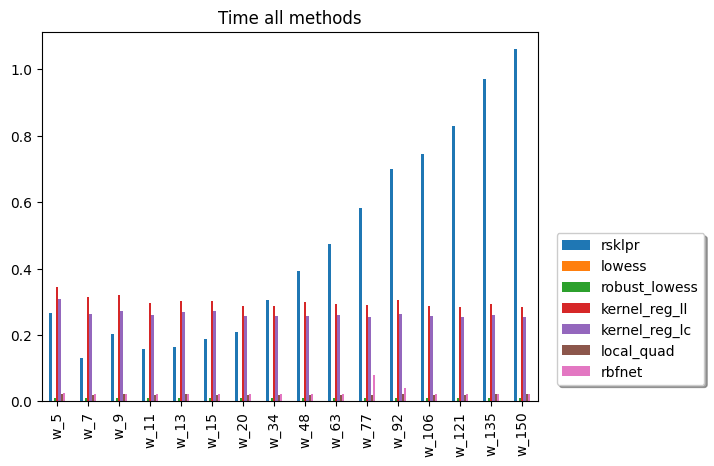

In [30]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="normal_reference",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [31]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.183225
w_7    kernel_reg_ll  0.183225
w_9    kernel_reg_ll  0.183225
w_11   kernel_reg_ll  0.183225
w_13   kernel_reg_ll  0.183225
w_15   kernel_reg_ll  0.183225
w_20   kernel_reg_ll  0.183225
w_34   kernel_reg_ll  0.183225
w_48   kernel_reg_ll  0.183225
w_63   kernel_reg_ll  0.183225
w_77   kernel_reg_ll  0.183225
w_92   kernel_reg_ll  0.183225
w_106  kernel_reg_ll  0.183225
w_121  kernel_reg_ll  0.183225
w_135  kernel_reg_ll  0.183225
w_150  kernel_reg_ll  0.183225

In [32]:
worst_for_window

method      rmse
w_5       local_quad  0.511054
w_7       local_quad  0.451042
w_9       local_quad  0.379395
w_11      local_quad  0.339921
w_13      local_quad  0.313885
w_15      local_quad  0.286772
w_20   robust_lowess  0.272929
w_34   robust_lowess  0.278315
w_48   robust_lowess  0.281395
w_63   robust_lowess  0.276717
w_77   robust_lowess  0.260368
w_92          rsklpr  0.277489
w_106         rsklpr  0.306758
w_121         rsklpr  0.335638
w_135         rsklpr  0.344988
w_150         lowess  0.365982

### High noise

Best performing method is rsklpr for size_neighborhood w_121


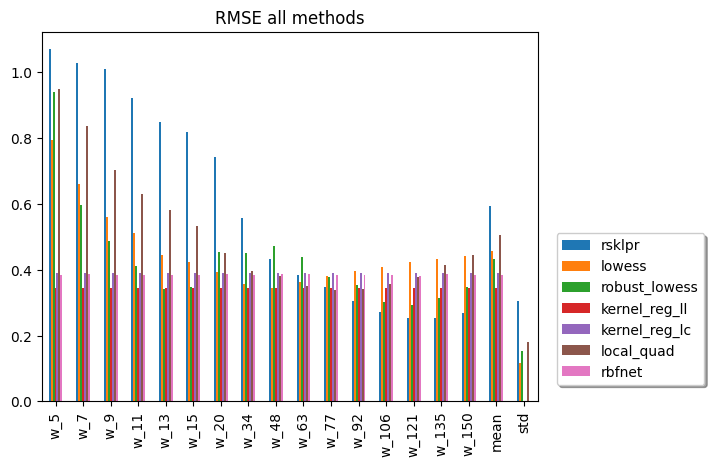

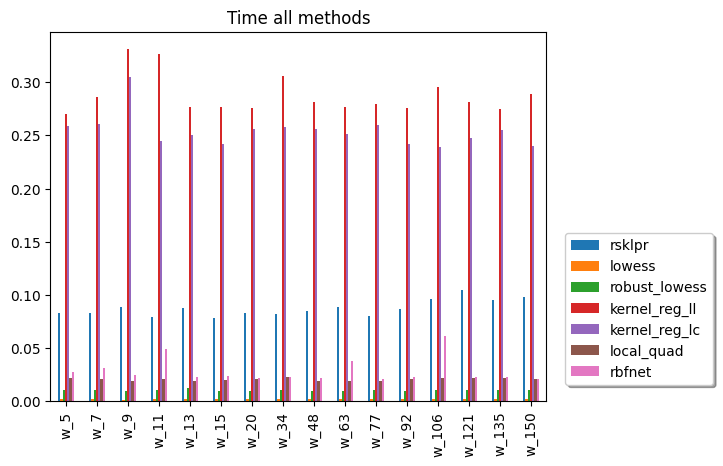

In [33]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [34]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.343574
w_7    kernel_reg_ll  0.343574
w_9    kernel_reg_ll  0.343574
w_11   kernel_reg_ll  0.343574
w_13   robust_lowess  0.342378
w_15   kernel_reg_ll  0.343574
w_20   kernel_reg_ll  0.343574
w_34   kernel_reg_ll  0.343574
w_48   kernel_reg_ll  0.343574
w_63   kernel_reg_ll  0.343574
w_77      local_quad  0.339979
w_92          rsklpr  0.306385
w_106         rsklpr  0.270570
w_121         rsklpr  0.252554
w_135         rsklpr  0.253614
w_150         rsklpr  0.269483

In [35]:
worst_for_window

method      rmse
w_5           rsklpr  1.069569
w_7           rsklpr  1.029580
w_9           rsklpr  1.009392
w_11          rsklpr  0.922392
w_13          rsklpr  0.849002
w_15          rsklpr  0.817383
w_20          rsklpr  0.743081
w_34          rsklpr  0.558014
w_48   robust_lowess  0.472281
w_63   robust_lowess  0.440015
w_77   kernel_reg_lc  0.389480
w_92          lowess  0.397558
w_106         lowess  0.409158
w_121         lowess  0.423189
w_135         lowess  0.431867
w_150     local_quad  0.443934

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_150


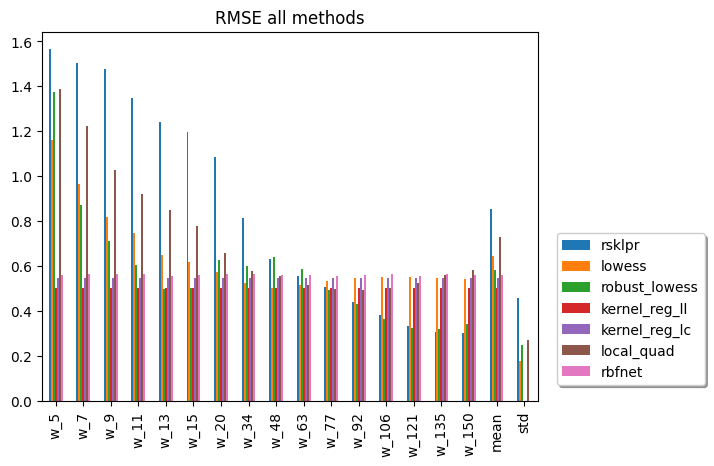

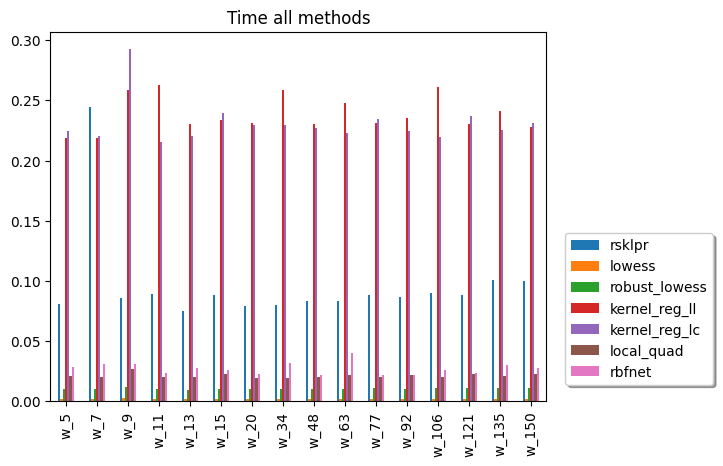

In [36]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [37]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.505924
w_7    kernel_reg_ll  0.505924
w_9    kernel_reg_ll  0.505924
w_11   kernel_reg_ll  0.505924
w_13   robust_lowess  0.500814
w_15   kernel_reg_ll  0.505924
w_20   kernel_reg_ll  0.505924
w_34   kernel_reg_ll  0.505924
w_48          lowess  0.504631
w_63   kernel_reg_ll  0.505924
w_77   robust_lowess  0.495192
w_92   robust_lowess  0.431463
w_106  robust_lowess  0.366601
w_121  robust_lowess  0.324759
w_135         rsklpr  0.309248
w_150         rsklpr  0.302162

In [38]:
worst_for_window

method      rmse
w_5           rsklpr  1.564747
w_7           rsklpr  1.505045
w_9           rsklpr  1.477627
w_11          rsklpr  1.349234
w_13          rsklpr  1.243786
w_15          rsklpr  1.196158
w_20          rsklpr  1.086916
w_34          rsklpr  0.816534
w_48   robust_lowess  0.639999
w_63   robust_lowess  0.588714
w_77          rbfnet  0.558653
w_92          rbfnet  0.563272
w_106         rbfnet  0.564176
w_121         rbfnet  0.559477
w_135         rbfnet  0.564406
w_150     local_quad  0.582579

## Curve 4

### Mild noise

Best performing method is local_quad for size_neighborhood w_34


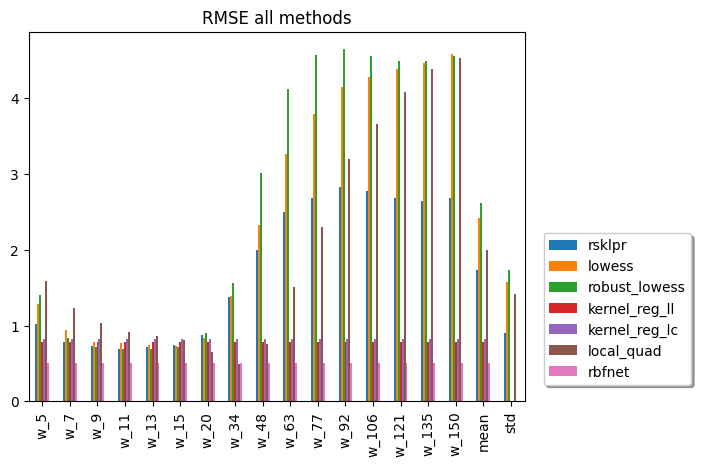

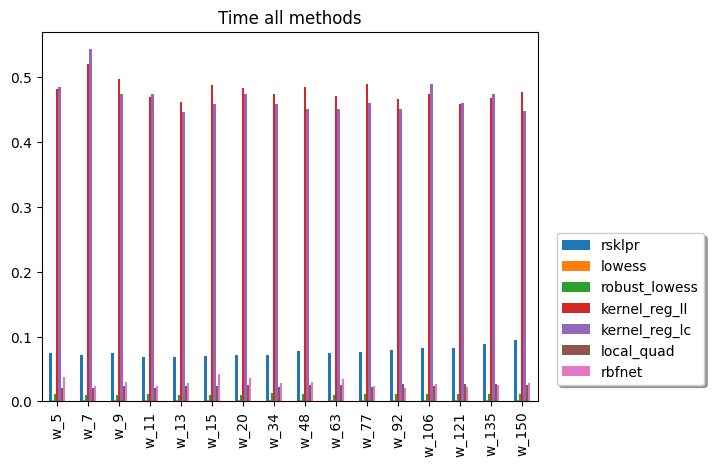

In [39]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [40]:
best_for_window

method      rmse
w_5        rbfnet  0.504292
w_7        rbfnet  0.504605
w_9        rbfnet  0.504334
w_11       rbfnet  0.504872
w_13       rbfnet  0.504304
w_15       rbfnet  0.504516
w_20       rbfnet  0.504414
w_34   local_quad  0.499161
w_48       rbfnet  0.504293
w_63       rbfnet  0.504420
w_77       rbfnet  0.504970
w_92       rbfnet  0.504429
w_106      rbfnet  0.504534
w_121      rbfnet  0.504196
w_135      rbfnet  0.504553
w_150      rbfnet  0.505051

In [41]:
worst_for_window

method      rmse
w_5       local_quad  1.592363
w_7       local_quad  1.233667
w_9       local_quad  1.034240
w_11      local_quad  0.910012
w_13      local_quad  0.863801
w_15   kernel_reg_lc  0.829549
w_20   robust_lowess  0.906165
w_34   robust_lowess  1.558422
w_48   robust_lowess  3.009399
w_63   robust_lowess  4.125525
w_77   robust_lowess  4.564031
w_92   robust_lowess  4.643956
w_106  robust_lowess  4.553251
w_121  robust_lowess  4.490169
w_135  robust_lowess  4.484644
w_150         lowess  4.579767

### Medium noise

Best performing method is local_quad for size_neighborhood w_34


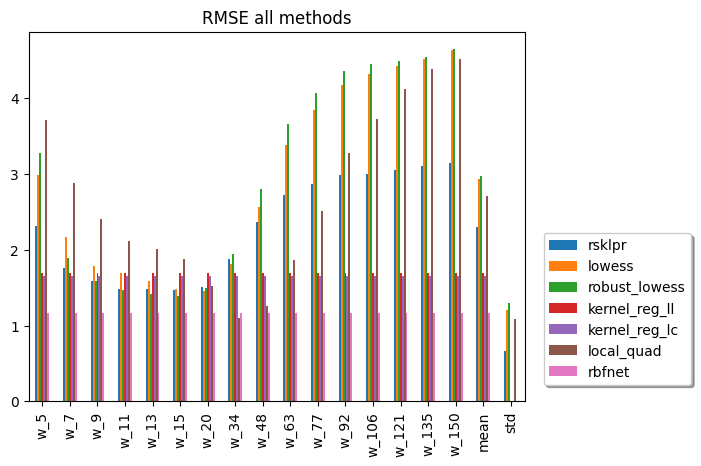

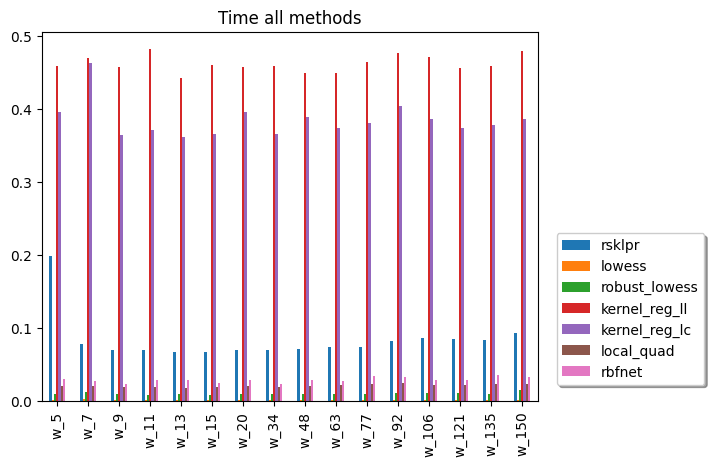

In [42]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [43]:
best_for_window

method      rmse
w_5        rbfnet  1.168022
w_7        rbfnet  1.168101
w_9        rbfnet  1.168033
w_11       rbfnet  1.168404
w_13       rbfnet  1.168188
w_15       rbfnet  1.168378
w_20       rbfnet  1.168183
w_34   local_quad  1.096258
w_48       rbfnet  1.168177
w_63       rbfnet  1.168173
w_77       rbfnet  1.168160
w_92       rbfnet  1.168212
w_106      rbfnet  1.168358
w_121      rbfnet  1.168432
w_135      rbfnet  1.167976
w_150      rbfnet  1.168038

In [44]:
worst_for_window

method      rmse
w_5       local_quad  3.715130
w_7       local_quad  2.878140
w_9       local_quad  2.412652
w_11      local_quad  2.122832
w_13      local_quad  2.015130
w_15      local_quad  1.885457
w_20   kernel_reg_ll  1.692250
w_34   robust_lowess  1.942482
w_48   robust_lowess  2.798546
w_63   robust_lowess  3.664971
w_77   robust_lowess  4.074096
w_92   robust_lowess  4.356053
w_106  robust_lowess  4.450923
w_121  robust_lowess  4.496414
w_135  robust_lowess  4.548636
w_150  robust_lowess  4.646888

### High noise

Best performing method is local_quad for size_neighborhood w_34


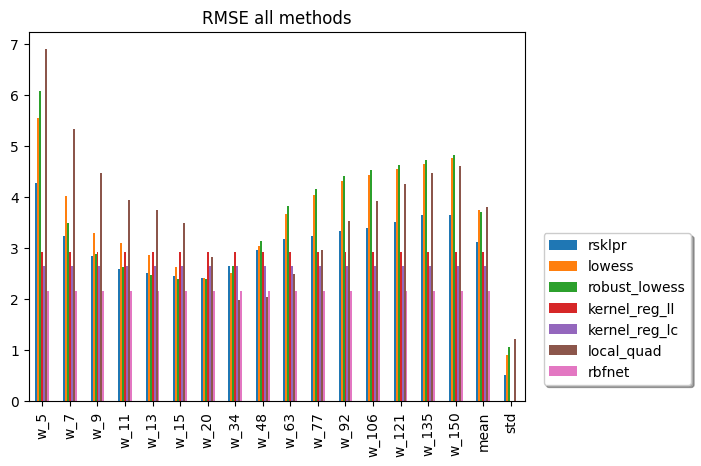

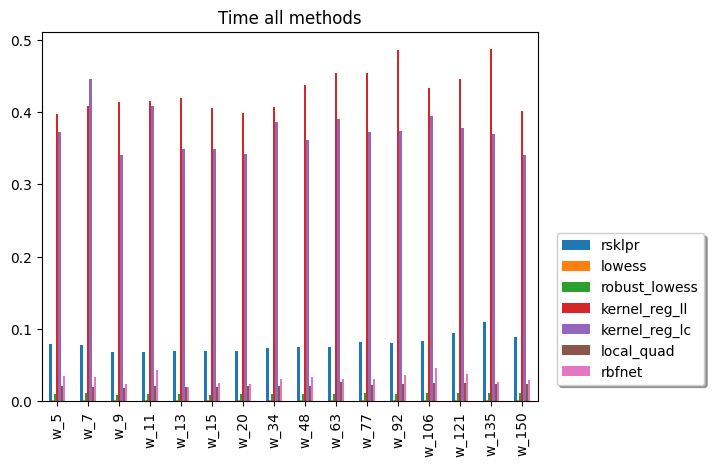

In [45]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [46]:
best_for_window

method      rmse
w_5        rbfnet  2.167165
w_7        rbfnet  2.166827
w_9        rbfnet  2.167174
w_11       rbfnet  2.166999
w_13       rbfnet  2.167791
w_15       rbfnet  2.167394
w_20       rbfnet  2.166482
w_34   local_quad  1.993564
w_48   local_quad  2.041117
w_63       rbfnet  2.167034
w_77       rbfnet  2.166873
w_92       rbfnet  2.166635
w_106      rbfnet  2.166827
w_121      rbfnet  2.166695
w_135      rbfnet  2.166622
w_150      rbfnet  2.167143

In [47]:
worst_for_window

method      rmse
w_5       local_quad  6.899280
w_7       local_quad  5.344851
w_9       local_quad  4.480269
w_11      local_quad  3.942066
w_13      local_quad  3.742135
w_15      local_quad  3.501633
w_20   kernel_reg_ll  2.922552
w_34   kernel_reg_ll  2.922552
w_48   robust_lowess  3.135245
w_63   robust_lowess  3.830819
w_77   robust_lowess  4.170492
w_92   robust_lowess  4.416815
w_106  robust_lowess  4.528023
w_121  robust_lowess  4.636954
w_135  robust_lowess  4.729388
w_150  robust_lowess  4.833246

### Extreme noise

Best performing method is local_quad for size_neighborhood w_48


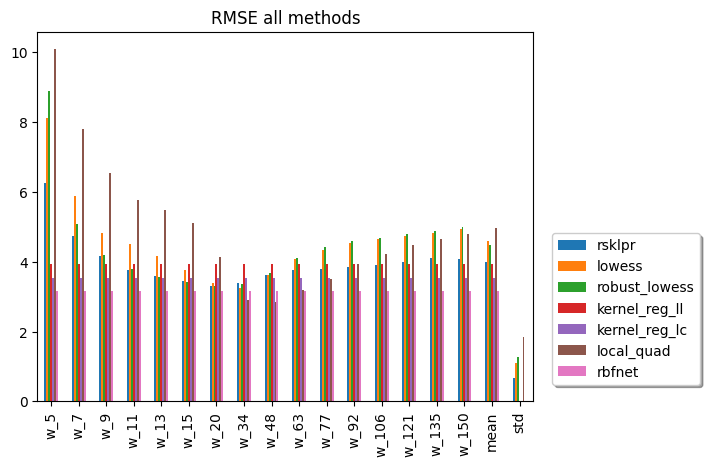

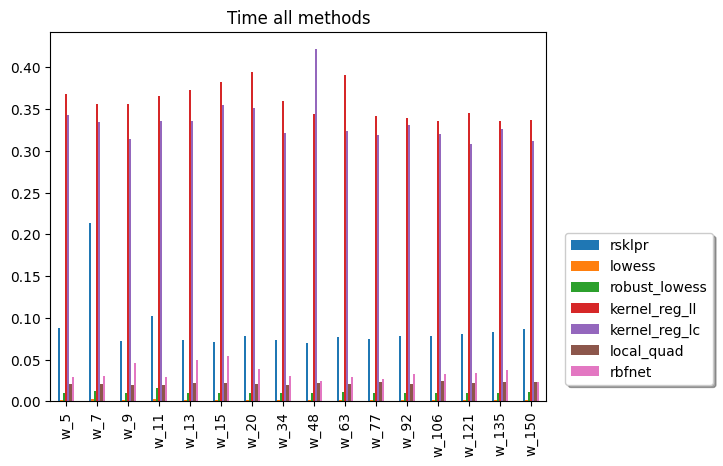

In [48]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [49]:
best_for_window

method      rmse
w_5        rbfnet  3.165838
w_7        rbfnet  3.166336
w_9        rbfnet  3.165843
w_11       rbfnet  3.165626
w_13       rbfnet  3.165971
w_15       rbfnet  3.166622
w_20       rbfnet  3.165771
w_34   local_quad  2.891214
w_48   local_quad  2.843501
w_63       rbfnet  3.166154
w_77       rbfnet  3.166482
w_92       rbfnet  3.166118
w_106      rbfnet  3.166169
w_121      rbfnet  3.166646
w_135      rbfnet  3.166112
w_150      rbfnet  3.166686

In [50]:
worst_for_window

method       rmse
w_5       local_quad  10.083431
w_7       local_quad   7.811561
w_9       local_quad   6.547887
w_11      local_quad   5.761301
w_13      local_quad   5.469143
w_15      local_quad   5.117814
w_20      local_quad   4.140349
w_34   kernel_reg_ll   3.948086
w_48   kernel_reg_ll   3.948086
w_63   robust_lowess   4.105177
w_77   robust_lowess   4.412387
w_92   robust_lowess   4.595000
w_106  robust_lowess   4.683937
w_121  robust_lowess   4.786967
w_135  robust_lowess   4.886033
w_150  robust_lowess   5.001588

## Curve 5

### Mild noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


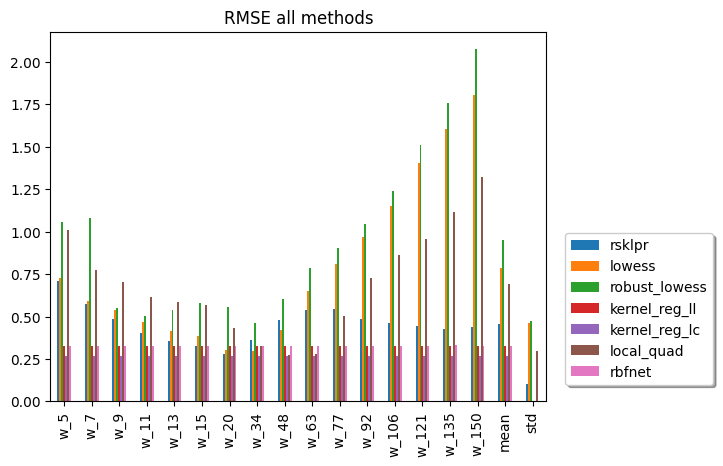

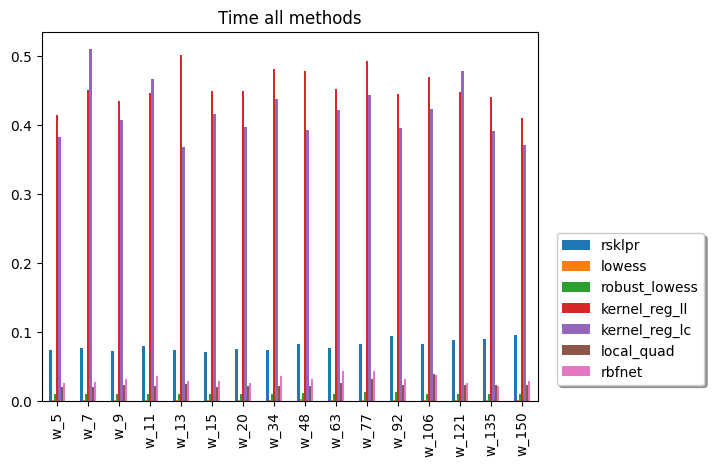

In [51]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [52]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.266346
w_7    kernel_reg_lc  0.266346
w_9    kernel_reg_lc  0.266346
w_11   kernel_reg_lc  0.266346
w_13   kernel_reg_lc  0.266346
w_15   kernel_reg_lc  0.266346
w_20   kernel_reg_lc  0.266346
w_34   kernel_reg_lc  0.266346
w_48   kernel_reg_lc  0.266346
w_63   kernel_reg_lc  0.266346
w_77   kernel_reg_lc  0.266346
w_92   kernel_reg_lc  0.266346
w_106  kernel_reg_lc  0.266346
w_121  kernel_reg_lc  0.266346
w_135  kernel_reg_lc  0.266346
w_150  kernel_reg_lc  0.266346

In [53]:
worst_for_window

method      rmse
w_5    robust_lowess  1.056440
w_7    robust_lowess  1.081853
w_9       local_quad  0.701344
w_11      local_quad  0.614684
w_13      local_quad  0.582882
w_15   robust_lowess  0.582020
w_20   robust_lowess  0.555297
w_34   robust_lowess  0.464065
w_48   robust_lowess  0.605934
w_63   robust_lowess  0.787506
w_77   robust_lowess  0.904203
w_92   robust_lowess  1.047824
w_106  robust_lowess  1.240399
w_121  robust_lowess  1.511455
w_135  robust_lowess  1.760414
w_150  robust_lowess  2.073784

### Medium noise

Best performing method is local_quad for size_neighborhood w_63


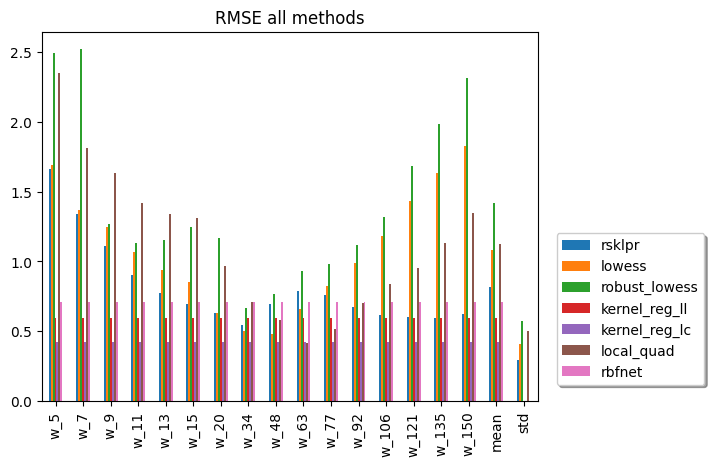

In [54]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [55]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.422533
w_7    kernel_reg_lc  0.422533
w_9    kernel_reg_lc  0.422533
w_11   kernel_reg_lc  0.422533
w_13   kernel_reg_lc  0.422533
w_15   kernel_reg_lc  0.422533
w_20   kernel_reg_lc  0.422533
w_34   kernel_reg_lc  0.422533
w_48   kernel_reg_lc  0.422533
w_63      local_quad  0.414445
w_77   kernel_reg_lc  0.422533
w_92   kernel_reg_lc  0.422533
w_106  kernel_reg_lc  0.422533
w_121  kernel_reg_lc  0.422533
w_135  kernel_reg_lc  0.422533
w_150  kernel_reg_lc  0.422533

In [56]:
worst_for_window

method      rmse
w_5    robust_lowess  2.488644
w_7    robust_lowess  2.515760
w_9       local_quad  1.630616
w_11      local_quad  1.420012
w_13      local_quad  1.342311
w_15      local_quad  1.309284
w_20   robust_lowess  1.165254
w_34          rbfnet  0.713712
w_48   robust_lowess  0.766322
w_63   robust_lowess  0.930869
w_77   robust_lowess  0.985460
w_92   robust_lowess  1.114548
w_106  robust_lowess  1.316710
w_121  robust_lowess  1.681412
w_135  robust_lowess  1.983711
w_150  robust_lowess  2.313352

### High noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


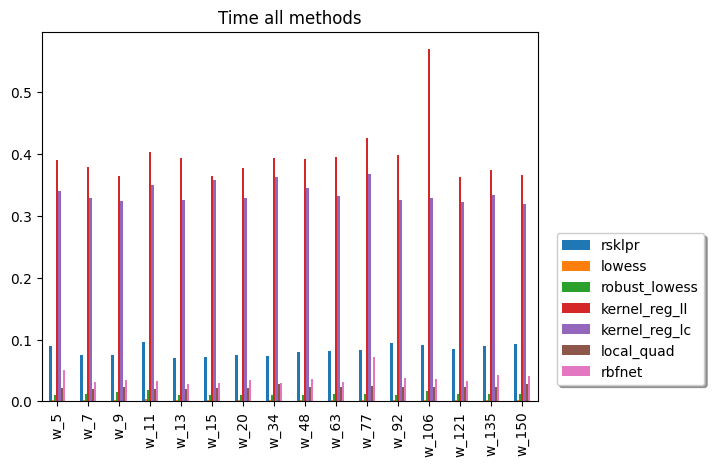

In [57]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [58]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.617097
w_7    kernel_reg_lc  0.617097
w_9    kernel_reg_lc  0.617097
w_11   kernel_reg_lc  0.617097
w_13   kernel_reg_lc  0.617097
w_15   kernel_reg_lc  0.617097
w_20   kernel_reg_lc  0.617097
w_34   kernel_reg_lc  0.617097
w_48   kernel_reg_lc  0.617097
w_63   kernel_reg_lc  0.617097
w_77   kernel_reg_lc  0.617097
w_92   kernel_reg_lc  0.617097
w_106  kernel_reg_lc  0.617097
w_121  kernel_reg_lc  0.617097
w_135  kernel_reg_lc  0.617097
w_150  kernel_reg_lc  0.617097

In [59]:
worst_for_window

method      rmse
w_5    robust_lowess  4.643732
w_7    robust_lowess  4.672660
w_9       local_quad  3.027583
w_11      local_quad  2.632567
w_13      local_quad  2.487207
w_15      local_quad  2.424504
w_20   robust_lowess  2.061433
w_34          rbfnet  1.304749
w_48          rbfnet  1.304578
w_63          rbfnet  1.304463
w_77          rbfnet  1.304538
w_92          rbfnet  1.304498
w_106  robust_lowess  1.442633
w_121  robust_lowess  1.821529
w_135  robust_lowess  2.113868
w_150  robust_lowess  2.373823

### Extreme noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


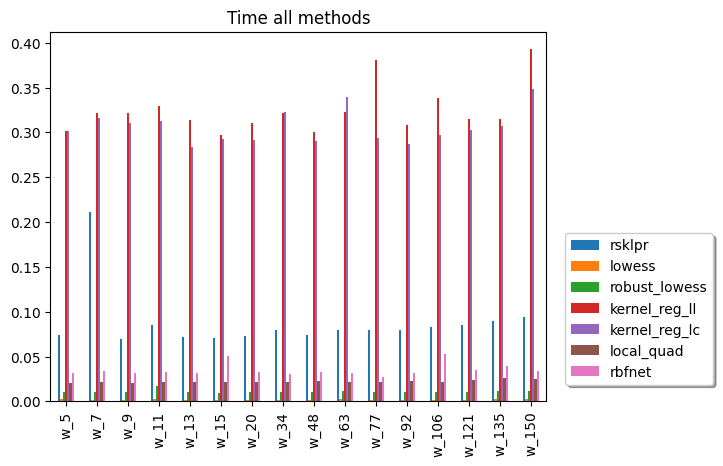

In [60]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [61]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.799503
w_7    kernel_reg_lc  0.799503
w_9    kernel_reg_lc  0.799503
w_11   kernel_reg_lc  0.799503
w_13   kernel_reg_lc  0.799503
w_15   kernel_reg_lc  0.799503
w_20   kernel_reg_lc  0.799503
w_34   kernel_reg_lc  0.799503
w_48   kernel_reg_lc  0.799503
w_63   kernel_reg_lc  0.799503
w_77   kernel_reg_lc  0.799503
w_92   kernel_reg_lc  0.799503
w_106  kernel_reg_lc  0.799503
w_121  kernel_reg_lc  0.799503
w_135  kernel_reg_lc  0.799503
w_150  kernel_reg_lc  0.799503

In [62]:
worst_for_window

method      rmse
w_5    robust_lowess  6.805425
w_7    robust_lowess  6.829569
w_9       local_quad  4.425131
w_11      local_quad  3.845995
w_13      local_quad  3.633207
w_15      local_quad  3.541080
w_20   robust_lowess  3.055970
w_34          rbfnet  1.900210
w_48          rbfnet  1.899845
w_63          rbfnet  1.899999
w_77          rbfnet  1.900190
w_92          rbfnet  1.900029
w_106         rbfnet  1.900097
w_121         rbfnet  1.900161
w_135  robust_lowess  2.173619
w_150  robust_lowess  2.346528